# Purpose

In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
import pprint
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']
import requests
from bs4 import BeautifulSoup
import dill

## Capture data from Wikipedia's pages from movies 2010-2016

In [2]:
years=range(2010,2017)
url = "https://en.wikipedia.org/wiki/List_of_American_films_of_"
responses = [requests.get(url+str(year)) for year in years ]
print responses[0].url
print responses[0].text[:1000] + "..."
print len(responses)

https://en.wikipedia.org/wiki/List_of_American_films_of_2010
<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>List of American films of 2010 - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_American_films_of_2010","wgTitle":"List of American films of 2010","wgCurRevisionId":755839865,"wgRevisionId":755839865,"wgArticleId":25636852,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Incomplete film lists","Commons category with local link same as on Wikidata","2010 in American cinema","Lists of 2010 films by country or language","Lists of American films by year"],"wgBreakFrames":false,"wgPageC

In [3]:
soups = [BeautifulSoup(response.text) for response in responses]
print soups[6].head()

[<meta charset="utf-8"/>, <title>List of American films of 2016 - Wikipedia</title>, <script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>, <script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_American_films_of_2016","wgTitle":"List of American films of 2016","wgCurRevisionId":760866101,"wgRevisionId":760866101,"wgArticleId":45452962,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Commons category with local link same as on Wikidata","Lists of American films by year","Lists of 2016 films by country or language","2016 in American cinema"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","w

## Capture table data from each year

In [4]:
tables = [ soup.select('table.wikitable') for soup in soups]

In [5]:
len(tables)

7

In [6]:
vintages = [[t.select('td') for t in table ]for table in tables]

In [24]:
data={'2010':[] , '2011':[], '2012':[], '2013':[], '2014':[], '2015':[], '2016':[]}
for year,vintage in zip(years,vintages):
    for releases in vintage:
        credits =[release.text for release in releases]
        data[str(year)].append(credits)
    

In [7]:
wikis={'2010':[] , '2011':[], '2012':[], '2013':[], '2014':[], '2015':[], '2016':[]}
for year,vintage in zip(years,vintages):
    for releases in vintage:
        for release in releases:
            try:
                links = release.select('a')
                for link in links:
                    wikis[str(year)].append(link['href'])
            except IndexError:
                continue


In [27]:
with open('wikis.dill', 'w') as filename:
    dill.dump(wikis,filename)

In [2]:
with open('wikis.dill') as f:
    wikis = dill.load(f)

In [39]:
len(wikis['2015'])

1157

In [40]:
filtered_wikis = wikis['2015']

In [41]:
url = 'https://en.wikipedia.org'
responses = []
for wiki in filtered_wikis:
    try:
        response = requests.get(url+wiki)
        responses.append(response)
    except requests.exceptions.RequestException:
        continue
        
print responses[0].url
print responses[0].text[:1000] + "..."
print len(responses)

https://en.wikipedia.org/wiki/The_Woman_in_Black_2:_Angel_of_Death
<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>The Woman in Black: Angel of Death - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"The_Woman_in_Black:_Angel_of_Death","wgTitle":"The Woman in Black: Angel of Death","wgCurRevisionId":755719637,"wgRevisionId":755719637,"wgArticleId":36132074,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages with citations lacking titles","Pages with citations having bare URLs","Use British English from January 2015","Use dmy dates from October 2014","Film articles using image size parameter","2

In [42]:
filtered_responses = [response for response in responses if 'vevent' in response.text]

In [43]:
with open('filtered_responses.dill', 'w') as filename:
    dill.dump(filtered_responses,filename)

In [3]:
with open('filtered_responses.dill') as f:
    filtered_responses = dill.load(f)

In [44]:
len(filtered_responses)

146

In [54]:
#selected_responses = filtered_responses[:100]
selected_responses = filtered_responses[100:]

In [ ]:
soups = [BeautifulSoup(response.text) for response in selected_responses]
print soups[0].head()

In [47]:
print len(soups)

100


In [48]:
boxes = [ soup.select('table.infobox.vevent') for soup in soups ]

In [9]:
import dill
#movies = []
with open('movies.dill') as f:
    movies = dill.load(f)

In [50]:
for box,response in zip(boxes,selected_responses):
    try:
        movie={}
        movie['title'] = box[0].select('th.summary')[0].text
        movie['site'] = response.url
        keys = box[0].select('th')[1:] 
        values = box[0].select('td')[1:]
        for k,v in zip(keys,values): 
            movie[k.text]=v.text
        movies.append(movie)
    except IndexError:
        continue

In [88]:
len(movies)

1795

In [90]:
movies[-3]

{u'\nProduction\ncompanies\n': u'\n\n\n\nFilmNation Entertainment\nThe Combine\nFaliro House Productions S.A.\n\n\n\n',
 u'\nRelease date\n': u'\n\n\nDecember\xa07,\xa02016\xa0(2016-12-07) (Arclight Hollywood)\nJanuary\xa020,\xa02017\xa0(2017-01-20) (United States)\n\n\n\n\n\n',
 u'\nRunning time\n': u'115 minutes[1]',
 u'Box office': u'$16.1 million[3]',
 u'Budget': u'$7 million[2]',
 u'Cinematography': u'John Schwartzman',
 u'Country': u'United States',
 u'Directed by': u'John Lee Hancock',
 u'Distributed by': u'The Weinstein Company',
 u'Edited by': u'Robert Frazen',
 u'Language': u'English',
 u'Music by': u'Carter Burwell',
 u'Produced by': u'\n\n\nDon Handfield\nKaren Lunder\nJeremy Renner\nAaron Ryder\n\n\n',
 u'Starring': u'\n\n\nMichael Keaton\nNick Offerman\nJohn Carroll Lynch\nLinda Cardellini\nPatrick Wilson\nB. J. Novak\nLaura Dern\n\n\n',
 u'Written by': u'Robert D. Siegel',
 'site': u'https://en.wikipedia.org/wiki/The_Founder_(film)',
 'title': u'The Founder'}

In [91]:
movies_filtered = [movie for movie in movies if u'Box office' in movie ]

In [92]:
len(movies_filtered )

1422

## Create a pandas dataframe with movie data

In [426]:
import pandas as pd
import numpy as np
import re

In [113]:
frames = []
for movie in movies_filtered:
    frame = pd.DataFrame(movie.values()).T
    frame.columns = movie.keys()
    frames.append(frame)

In [115]:
df =pd.concat(frames)

In [164]:
df.columns

Index([u'\nProduction\ncompanies\n',   u'\nProduction\ncompany\n',
                u'\nRelease date\n',          u'\nRunning time\n',
                        u'Based on',                u'Box office',
                          u'Budget',                 u'Cantonese',
                  u'Cinematography',                   u'Country',
                     u'Directed by',            u'Distributed by',
                       u'Edited by',                   u'Hepburn',
                        u'Japanese',                  u'Language',
                       u'Literally',                  u'Mandarin',
                        u'Music by',               u'Narrated by',
                     u'Produced by',             u'Screenplay by',
                      u'Simplified',                  u'Starring',
                        u'Story by',               u'Traditional',
                      u'Written by',                      u'site',
                           u'title',                    u'stud

In [166]:
df.index= np.arange(len(df))

### Combine productions companies into studio

In [168]:
df['studio']=df[u'\nProduction\ncompanies\n']

In [171]:
df.loc[df['studio'].isnull()==True,'studio']=df[u'\nProduction\ncompany\n']

### Generate csv file to export

In [579]:
df.to_csv('movies2010_2016.csv', encoding='utf-8')

### Convert Box Office to Float

In [526]:
revenues = []
for index, row in df.iterrows():
    if type(row[u'Box office'])==unicode:
        value = row[u'Box office'].lower() 
    else:
        value = row[u'Box office']
    if 'million'in value:
        value = value.split('million')[0].strip()
        if u'\u2013'in value:
            value = value.split(u'\u2013')[0]
        if '$' in value:
            value = value.split('$')[1]
        try:
            value = float(value)*1000000
        except ValueError:
            #value = 0
            pass
    elif 'billion'in value:
        value = value.split('billion')[0].strip()
        if '$' in value:
            value = value.split('$')[1]
        try:
            value = float(value)*1000000000
        except ValueError:
            #value = 0
            pass

        
    else:

        if ',' in value:
            value = re.sub(r'\,', '', value, flags=re.IGNORECASE)
        if '[' in value:
            value = value.split('[')[0].strip()
        if '(' in value: 
            value = value.split('(')[0].strip()
        if 'approx' in value: 
            value = value.split('approx')[0].strip()
        if '$' in value:
            value = value.split('$')[1]  
        try:
            value = float(value)
        except ValueError:
            #value = 0
            pass

    revenues.append(value)
        

In [527]:
df['revenues']=revenues

In [528]:
df.loc[df['revenues'].notnull()==True,'check_rev'] = df['revenues'].apply(lambda x: type(x) )

In [529]:
df[df['check_rev'] == unicode]

,Production companies,Production company,Release date,Running time,Based on,Box office,Budget,Cantonese,Cinematography,Country,...,studio,revenues,release_dates,release_year,release_month,realease_day,release_day,costs,check_costs,check_rev
601,NaN,\n\n\n\nFilmNation Entertainment\nRelativity M...,"\n\n\nMarch 9, 2012 (2012-03-09)\n\n\n\n\n\n\n",111 minutes[2],NaN,$29.7M[4],$26M[3],NaN,Danny Ruhlmann,United States,...,\n\n\n\nFilmNation Entertainment\nRelativity M...,29.7m,[2012-03-09 00:00:00],2012,3,3/9,3/9,2.6e+07,<type 'float'>,<type 'unicode'>
797,NaN,\nCinemagic Pictures\n,"\n\n\nNovember 22, 1978 (1978-11-22)\n\n\n\n\n...",101 minutes,NaN,Unknown,"$650,000",NaN,Nouri Haviv,United States,...,\nCinemagic Pictures\n,unknown,[1978-11-22 00:00:00],1978,11,11/22,11/22,650000,<type 'float'>,<type 'unicode'>
888,NaN,\nArc Productions\nArad Productions\nCrystal S...,"\n\n\nMay 28, 2013 (2013-05-28)[1]\n\n\n\n\n\n\n",86 minutes[2],Robosapien by WowWee,Unknown,$15 million[3],NaN,Christian Sebaldt,United States,...,\nArc Productions\nArad Productions\nCrystal S...,unknown,[2013-05-28 00:00:00],2013,5,5/28,5/28,1.5e+07,<type 'float'>,<type 'unicode'>
1398,NaN,\nToho\n,\n\n\n26 April 1954 (1954-04-26)\n\n\n\n\n\n\n,207 minutes,NaN,¥268 million[1],¥125 million[1],NaN,Asakazu Nakai,Japan,...,\nToho\n,¥268,[1954-04-26 00:00:00],1954,4,4/26,4/26,¥125,<type 'unicode'>,<type 'unicode'>


In [536]:
df_rev = df[df['check_rev']==float]
print 'Size of industry (based on sample): %d billion dollars' % (df_rev['revenues'].sum()/1000000000)

Size of industry (based on sample): 242 billion dollars


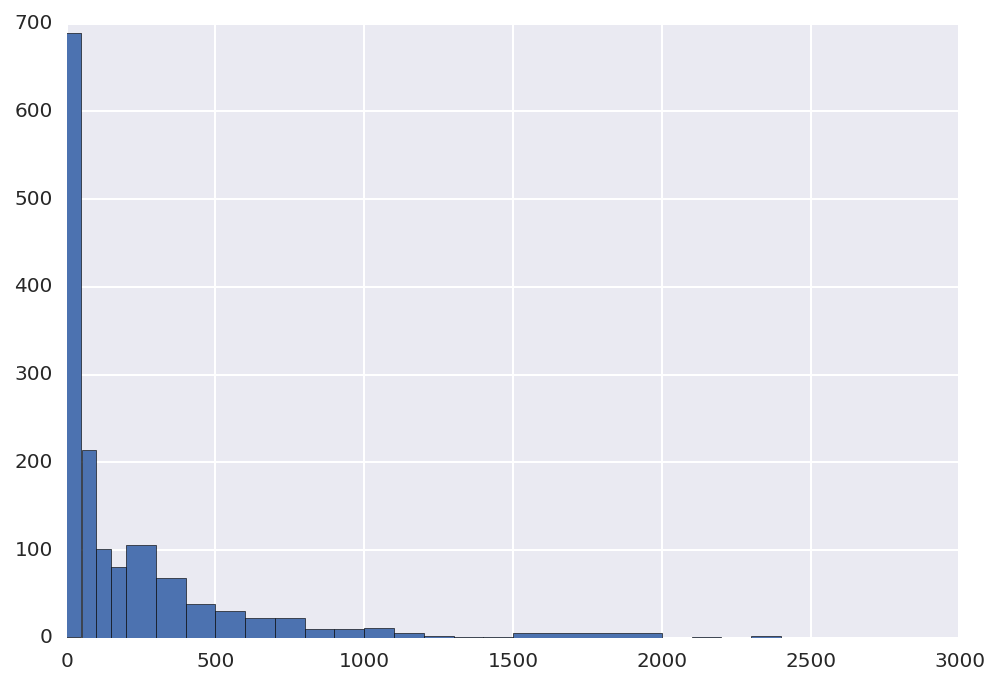

In [462]:
rev = (df['revenues']/1000000).hist(bins=[0, 50, 100, 150,200, 300, 400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,2000,2100,2200,2300,2400,2500,3000])
rev_fig = rev.get_figure()
rev_fig.savefig('revenue_histogram.png')

### Convert Budget to Float

In [502]:
costs = []
for index, row in df.iterrows():
    if type(row[u'Budget'])==unicode:
        value = row[u'Budget'].lower() 
        if 'million' in value:
            value = value.split('million')[0].strip()
            if '[' in value:
                value = value.split('[')[0].strip()
            if u'\u2013'in value:
                value = value.split(u'\u2013')[0].strip()
            if '-'in value:
                value = value.split('-')[0].strip()
            if '$' in value:
                value = value.split('$')[1]
            try:
                value = float(value)*1000000
            except ValueError:
                #value = 0
                pass
        
        elif 'm' in value:
            value = value.split('m')[0].strip()
            if '[' in value:
                value = value.split('[')[0].strip()
            if u'\u2013'in value:
                value = value.split(u'\u2013')[0].strip()
            if '-'in value:
                value = value.split('-')[0].strip()
            if '$' in value:
                value = value.split('$')[1]
            try:
                value = float(value)*1000000
            except ValueError:
                #value = 0
                pass
        
        else:
            if ',' in value:
                value = re.sub(r'\,', '', value, flags=re.IGNORECASE)
            if '[' in value:
                value = value.split('[')[0].strip()
            if '(' in value: 
                value = value.split('(')[0].strip()
            if 'approx' in value: 
                value = value.split('approx')[0].strip()
            if '$' in value:
                value = value.split('$')[1]  
            try:
                value = float(value)
            except ValueError:
                #value = 0
                pass
    else:
        value = row[u'Budget']


    costs.append(value)
        

In [503]:
df['costs']=costs

In [505]:
df.loc[df['costs'].notnull()==True,'check_costs'] = df['costs'].apply(lambda x: type(x) )

In [506]:
df[df['check_costs'] == unicode]

,Production companies,Production company,Release date,Running time,Based on,Box office,Budget,Cantonese,Cinematography,Country,...,title,studio,revenues,release_dates,release_year,release_month,realease_day,release_day,costs,check_costs
197,NaN,NaN,\n\n\n27 April 2005 (2005-04-27) (France)\n\n\...,90 minutes,NaN,"$6,306,533 (Int'l)[2]","€11,160,000[1]",NaN,Denis Rouden,France,...,Anthony Zimmer,NaN,6.306533e+06,[2005-04-27 00:00:00],2005,4,4/27,4/27,€11160000,<type 'unicode'>
600,NaN,\nAmalgam Features\nWaypoint Entertainment\n,"\n\n\nSeptember 10, 2011 (2011-09-10) (TIFF)\n...",108 minutes,NaN,"$1,567,905[2]","$12,000,000 (estimated)[1]",NaN,Bobby Bukowski,United States,...,Rampart,\nAmalgam Features\nWaypoint Entertainment\n,1.567905e+06,"[2011-09-10 00:00:00, 2012-02-10 00:00:00]",2012,2,2/10,2/10,"12,000,000 (esti",<type 'unicode'>
605,NaN,NaN,"\n\n\nJanuary 20, 2012 (2012-01-20) (Sundance)...",113 min.,NaN,"$13,551,174[2]","€14,000,000[1]",NaN,Xavi Giménez,\n\n\nSpain\nUnited States\n\n\n,...,Red Lights,NaN,1.355117e+07,"[2012-01-20 00:00:00, 2012-03-02 00:00:00, 201...",2012,7,7/13,7/13,€14000000,<type 'unicode'>
898,NaN,\n\n\n\nA Single Shot Productions\nBron Studio...,"\n\n\nFebruary 13, 2013 (2013-02-13) (Berlin I...",112 minutes,A Single Shot\nby Matthew F. Jones,"$18,642[1]",N/A,NaN,Eduard Grau,United States,...,A Single Shot,\n\n\n\nA Single Shot Productions\nBron Studio...,1.864200e+04,"[2013-02-13 00:00:00, 2013-09-20 00:00:00]",2013,9,9/20,9/20,n/a,<type 'unicode'>
1001,NaN,NaN,\n\n\n10 November 2004 (2004-11-10) (France)\n...,86 minutes,NaN,$9.6–$11.6 million[2][3],€13 million[1],NaN,NaN,France,...,District 13,NaN,0.000000e+00,[2004-11-10 00:00:00],2004,11,11/10,11/10,€13,<type 'unicode'>
1139,NaN,\n\n\n\nHeyday Films\nStudioCanal\n\n\n\n,\n\n\n28 November 2014 (2014-11-28)\n\n\n\n\n\n\n,95 minutes[1],Paddington Bear\nby Michael Bond,$288.7 million[3],€38.5 million ($50–55 million),NaN,Erik Wilson,\n\n\nUnited Kingdom\nFrance[2]\n\n\n,...,Paddington,\n\n\n\nHeyday Films\nStudioCanal\n\n\n\n,2.887000e+08,[2014-11-28 00:00:00],2014,11,11/28,11/28,€38.5,<type 'unicode'>
1217,NaN,Rie Matsubara,Toho,\n\n\n19 July 2014 (2014-07-19)\n\n\n\n\n\n\n,\n\n\nMasashi Andō\nKeiko Niwa\nHiromasa Yoneb...,¥1.15 billion\n(US$10.5 million),Japanese,NaN,Takatsugu Muramatsu,103 minutes[1],...,When Marnie Was There,Rie Matsubara,1.050000e+07,[],NA,NA,NA,NA,japanese,<type 'unicode'>
1268,Cheung Ka-fai,NaN,Pegasus Motion Pictures,\n\n\n16 December 2015 (2015-12-16) (Hong Kong...,NaN,US$36 million[3],Cantonese,Yè Wèn Sān,Kenji Kawai,105 minutes[2],...,Ip Man 3,Cheung Ka-fai,3.600000e+07,[],NA,NA,NA,NA,cantonese,<type 'unicode'>
1331,NaN,\n\n\n\nMarvel Studios\nColumbia Pictures (SM)...,2008–present,NaN,Characters published\nby Marvel Comics,Total (14 films):\n$10.9 billion,Total (14 films):\n$2.53 billion,NaN,NaN,United States,...,Marvel Cinematic Universe films,\n\n\n\nMarvel Studios\nColumbia Pictures (SM)...,1.090000e+10,[],NA,NA,NA,NA,total (14 fil,<type 'unicode'>
1340,\n\n\n\n20th Century Fox\nMarvel Entertainment...,NaN,NaN,NaN,NaN,$4.3 billion (9 films),$1.261 billion (9 films),NaN,NaN,United States,...,X-Men,\n\n\n\n20th Century Fox\nMarvel Entertainment...,4.300000e+09,"[2016-05-09 00:00:00, 2016-05-27 00:00:00]",2016,5,5/27,5/27,1.261 billion (9 fil,<type 'unicode'>


In [538]:
df_cost = df[df['check_costs']==float]
print 'Budget of movies included in sample: %d billion dollars' %  (df_cost['costs'].sum()/1000000000)

Budget of movies included in sample: 63 billion dollars


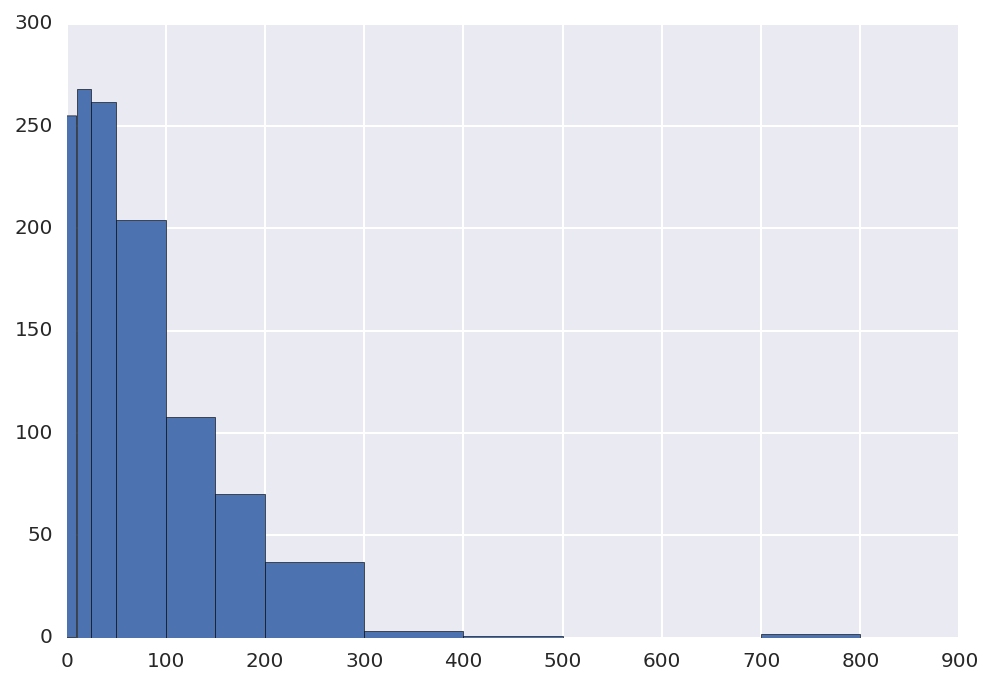

In [545]:
p_cost = (df_cost['costs']/1000000).hist(bins=[0,10,25, 50, 100, 150,200, 300, 400,500,600,700,800,900])
cost_fig = p_cost.get_figure()
cost_fig.savefig('cost_histogram.png')

In [552]:
df_set = df[df['check_rev']==float]
df_set = df_set[df_set['check_costs']==float]

In [566]:
df_list = df_set[['title','revenues', 'costs']]

In [560]:
df_set['costs'].sum()/1000000000

63.648752414

In [570]:
df_list.index= df_list['title']
df_list = df_list[['revenues', 'costs']]

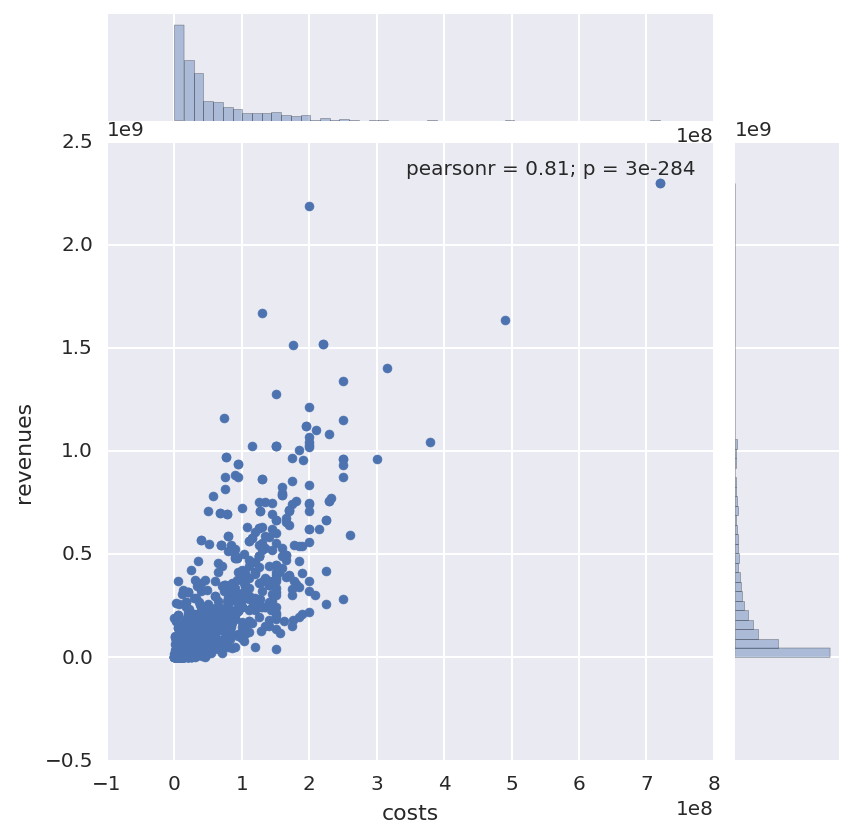

In [581]:
plot = sns.jointplot(x='costs', y='revenues', data=df_list)
plot.savefig("correlation.png")

### Convert Release date into datetime

In [277]:
date = df[u'\nRelease date\n' ][0]

In [323]:
from datetime import datetime
dates = []
premieres = []
for index, row in df.iterrows():
    raw_dates = row[u'\nRelease date\n']
    try:
        filtered_dates = re.findall("([0-9]{4}\-[0-9]{2}\-[0-9]{2})", raw_dates)
        movie_dates = [datetime.strptime(date, '%Y-%m-%d') for date in filtered_dates]
    except TypeError:
        pass
    dates.append(movie_dates)
    

In [325]:
df['release_dates'] = dates

In [350]:
dates

[[datetime.datetime(2010, 9, 4, 0, 0),
  datetime.datetime(2010, 11, 5, 0, 0),
  datetime.datetime(2011, 1, 7, 0, 0)],
 [datetime.datetime(2010, 1, 18, 0, 0), datetime.datetime(2010, 6, 18, 0, 0)],
 [datetime.datetime(2010, 6, 11, 0, 0)],
 [datetime.datetime(2010, 5, 21, 0, 0), datetime.datetime(2011, 7, 22, 0, 0)],
 [datetime.datetime(2010, 2, 25, 0, 0), datetime.datetime(2010, 3, 5, 0, 0)],
 [datetime.datetime(2010, 12, 3, 0, 0)],
 [datetime.datetime(2010, 9, 8, 0, 0), datetime.datetime(2010, 9, 17, 0, 0)],
 [datetime.datetime(2010, 9, 1, 0, 0)],
 [datetime.datetime(2010, 4, 23, 0, 0)],
 [datetime.datetime(2010, 9, 1, 0, 0), datetime.datetime(2010, 12, 3, 0, 0)],
 [datetime.datetime(2010, 1, 24, 0, 0),
  datetime.datetime(2010, 12, 29, 0, 0),
  datetime.datetime(2011, 1, 14, 0, 0)],
 [datetime.datetime(2010, 1, 15, 0, 0)],
 [datetime.datetime(2010, 3, 19, 0, 0)],
 [datetime.datetime(2009, 1, 16, 0, 0), datetime.datetime(2010, 3, 5, 0, 0)],
 [datetime.datetime(2010, 9, 24, 0, 0)],
 [d

In [358]:
df['release_year']= df['release_dates'].apply(lambda x: x[-1].year if x else 'NA' )

In [364]:
df['release_month']= df['release_dates'].apply(lambda x: x[-1].month if x else 'NA' )

In [369]:
df['release_day']=df['release_dates'].apply(lambda x: str(x[-1].month)+'/'+str(x[-1].day) if x else 'NA' )

In [564]:
df[(df['check_rev']==float)&(df['release_year']>2009)].groupby('release_month')['revenues'].sum()/1000000000

release_month
1      5.715583
2      9.770334
3     17.383985
4     12.527704
5     38.342979
6     25.728437
7     26.649982
8     11.794753
9      6.826071
10     8.453555
11    18.663282
12    13.677462
NA    16.069378
Name: revenues, dtype: float64

In [547]:
df[(df['check_rev']==float)&(df['release_year']>2009)].groupby('release_day')['revenues'].sum()/1000000000

release_day
1/1       0.042600
1/10      0.249000
1/11      0.225428
1/13      0.192058
1/14      0.315234
1/15      0.426008
1/16      0.103100
1/17      0.481400
1/18      0.083520
1/19      0.000022
1/2       0.048900
1/20      0.291390
1/21      0.481050
1/22      0.469534
1/23      0.316732
1/25      0.081048
1/26      0.000540
1/27      0.160653
1/28      0.178336
1/29      0.864018
1/3       0.091390
1/30      0.141000
1/31      0.060776
1/4       0.047212
1/6       0.101800
1/7       0.172829
1/8       0.090006
10/1      0.253256
10/10     0.252300
10/11     0.234295
           ...    
8/7       0.472248
8/8       1.437700
8/9       0.769842
9/1       0.067900
9/10      0.601297
9/11      0.003202
9/12      0.118661
9/13      0.162009
9/14      0.047368
9/16      0.167815
9/17      0.345926
9/18      0.340700
9/19      0.453600
9/2       0.080236
9/20      0.122787
9/21      0.184107
9/22      0.068600
9/23      0.766374
9/24      0.194779
9/25      0.012700
9/26      0.302610


In [576]:
df[(df['check_rev']==float)].groupby('release_year')['revenues'].sum()/1000000 /df[(df['check_rev']==float)].groupby('release_year')['revenues'].count()

release_year
1950     263.600000
1960       2.250000
1971       8.000000
1973       0.143784
1978      16.000000
1981      56.318119
1982      58.100000
1983      19.150000
1984      47.958832
1985      24.900000
1987      48.600000
1990      57.100000
1991     254.250000
1993       8.000000
1994     131.400000
1995     373.600000
1996     817.400000
1997    2187.000000
1998      65.400000
1999     395.318445
2000     161.800000
2001     354.075000
2002     405.250000
2003     577.262301
2004     135.666667
2005      82.553267
2006     219.521091
2007     352.830045
2008     361.775000
2009     377.753079
2010     147.811120
2011     142.938318
2012     134.747653
2013     121.507888
2014     174.489822
2015     171.863851
2016     202.637314
2017      30.166667
NA       892.743205
Name: revenues, dtype: float64

In [577]:
df[(df['check_rev']==float)&(df['release_year']>2009)].groupby('release_month')['revenues'].count()

release_month
1     103
2      99
3     133
4     132
5     106
6     106
7     115
8     116
9     116
10    107
11     87
12     75
NA     18
Name: revenues, dtype: int64

In [372]:
df[(df['revenues']>1000000)&(df['release_year']>2009)].groupby('release_month')['revenues'].sum()/1000000000/df[(df['revenues']>1000000)&(df['release_year']>2009)].groupby('release_month')['revenues'].count()


release_month
1     0.070518
2     0.119124
3     0.148397
4     0.121531
5     0.440681
6     0.265228
7     0.266467
8     0.118640
9     0.074127
10    0.094819
11    0.227593
12    0.207192
NA    1.235932
Name: revenues, dtype: float64

In [578]:
df[df['release_year']==2015].count()

\nProduction\ncompanies\n     35
\nProduction\ncompany\n       70
\nRelease date\n             107
\nRunning time\n             106
Based on                      44
Box office                   107
Budget                        92
Cantonese                      0
Cinematography               102
Country                      107
Directed by                  107
Distributed by               106
Edited by                    104
Hepburn                        0
Japanese                       0
Language                     107
Literally                      0
Mandarin                       0
Music by                     104
Narrated by                    6
Produced by                  107
Screenplay by                 46
Simplified                     0
Starring                     106
Story by                      23
Traditional                    0
Written by                    60
site                         107
title                        107
studio                       105
revenues  

In [357]:
df[df['release_year']==2015]

,Production companies,Production company,Release date,Running time,Based on,Box office,Budget,Cantonese,Cinematography,Country,...,Starring,Story by,Traditional,Written by,site,title,studio,revenues,release_dates,release_year
1138,NaN,\n\n\n\nLegendary Pictures\nForward Pass\n\n\n\n,"\n\n\nJanuary 8, 2015 (2015-01-08) (Los Angele...",133 minutes[2],NaN,$19.7 million[3],$70 million[3],NaN,Stuart Dryburgh,United States,...,\n\n\nChris Hemsworth\nTang Wei\nViola Davis\n...,NaN,NaN,\n\n\nMorgan Davis Foehl\nMichael Mann\n\n\n,https://en.wikipedia.org/wiki/Blackhat_(film),Blackhat,\n\n\n\nLegendary Pictures\nForward Pass\n\n\n\n,1.970000e+07,"[2015-01-08 00:00:00, 2015-01-16 00:00:00]",2015
1140,NaN,\n\n\n\nBrookwell-McNamara Entertainment\nPant...,"\n\n\nJanuary 16, 2015 (2015-01-16)\n\n\n\n\n\n\n",115 minutes[1],La Vida Robot\nby Joshua Davis,$3.6 million[2],NaN,NaN,Richard Wong,United States,...,\n\n\nGeorge Lopez\nJamie Lee Curtis\nCarlos P...,NaN,NaN,Elissa Matsueda,https://en.wikipedia.org/wiki/Spare_Parts_(film),Spare Parts,\n\n\n\nBrookwell-McNamara Entertainment\nPant...,3.600000e+06,[2015-01-16 00:00:00],2015
1141,NaN,\n\n\n\nMiramax\nLStar Capital\nWill Packer Pr...,"\n\n\nJanuary 16, 2015 (2015-01-16)\n\n\n\n\n\n\n",101 minutes[3],NaN,$79.8 million[4],$23 million[4],NaN,Bradford Lipson[2],United States,...,\n\n\nKevin Hart\nJosh Gad\nKaley Cuoco\nKen H...,NaN,NaN,\n\n\nJeremy Garelick\nJay Lavender\n\n\n,https://en.wikipedia.org/wiki/The_Wedding_Ringer,The Wedding Ringer,\n\n\n\nMiramax\nLStar Capital\nWill Packer Pr...,7.980000e+07,[2015-01-16 00:00:00],2015
1143,\n\n\n\nBlumhouse Productions\nSmart Entertain...,NaN,"\n\n\nJanuary 23, 2015 (2015-01-23) (United St...",90 minutes[1],NaN,$61.8 million[4][3],$4 million[2][3],NaN,Dave McFarland,United States,...,\n\n\nJennifer Lopez\nRyan Guzman\nJohn Corbet...,NaN,NaN,Barbara Curry,https://en.wikipedia.org/wiki/The_Boy_Next_Doo...,The Boy Next Door,\n\n\n\nBlumhouse Productions\nSmart Entertain...,6.180000e+07,[2015-01-23 00:00:00],2015
1145,NaN,\n\n\n\nInfinitum Nihil\nMad Chance Production...,"\n\n\nJanuary 23, 2015 (2015-01-23)\n\n\n\n\n\n\n",106 minutes[1],Don't Point that Thing at Me\nby Kyril Bonfigl...,$47.3 million[3],$60 million[2],NaN,Florian Hoffmeister,United States,...,\n\n\nJohnny Depp\nGwyneth Paltrow\nEwan McGre...,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Mortdecai_(film),Mortdecai,\n\n\n\nInfinitum Nihil\nMad Chance Production...,4.730000e+07,[2015-01-23 00:00:00],2015
1147,NaN,\n\n\n\nTouchstone Pictures\nLucasfilm Ltd.\nL...,"\n\n\nJanuary 23, 2015 (2015-01-23)\n\n\n\n\n\n\n",99 minutes[1][2],NaN,$13.6 million[3],NaN,NaN,NaN,United States,...,\n\n\nAlan Cumming\nEvan Rachel Wood\nKristin ...,George Lucas,NaN,NaN,https://en.wikipedia.org/wiki/Strange_Magic_(f...,Strange Magic,\n\n\n\nTouchstone Pictures\nLucasfilm Ltd.\nL...,1.360000e+07,[2015-01-23 00:00:00],2015
1150,NaN,\nInsurge Pictures\nMTV Films\nPlatinum Dunes\n,"\n\n\nJanuary 30, 2015 (2015-01-30)\n\n\n\n\n\n\n",106 minutes[1],NaN,$33.2 million[3],$12 million[2],NaN,Matthew J Lloyd,United States,...,Jonny Weston\nSofia Black D'Elia\nSam Lerner\n...,NaN,NaN,Jason Harry Pagan\nAndrew Deutschman,https://en.wikipedia.org/wiki/Project_Almanac,Project Almanac,\nInsurge Pictures\nMTV Films\nPlatinum Dunes\n,3.320000e+07,[2015-01-30 00:00:00],2015
1151,NaN,\n\n\n\nCurrent Entertainment\nQuad Films\nSJ ...,"\n\n\nJanuary 14, 2015 (2015-01-14) (France)\n...",92 minutes[1],Heat\nby William Goldman,$76.0 million[3],$30 million[2],NaN,Shelly Johnson,United States,...,\n\n\nJason Statham\nMichael Angarano\nMilo Ve...,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Wild_Card_(2015_...,Wild Card,\n\n\n\nCurrent Entertainment\nQuad Films\nSJ ...,7.600000e+07,"[2015-01-14 00:00:00, 2015-01-30 00:00:00]",2015
1152,NaN,\n\n\n\nVillage Roadshow Pictures\nRatPac-Dune...,"\n\n\nJanuary 27, 2015 (2015-01-27) (Sundance ...",127 minutes[2],NaN,$184 million[3],$176 million[3],NaN,John Toll,\n\n\nUnited States\nAustralia\n\n\n,.

In [349]:
df[df['release_dates'].isnull()]

,Production companies,Production company,Release date,Running time,Based on,Box office,Budget,Cantonese,Cinematography,Country,...,Starring,Story by,Traditional,Written by,site,title,studio,revenues,release_dates,release_year


In [53]:
with open('movies.dill', 'w') as filename:
    dill.dump(movies,filename)

In [ ]:
movies = { '2010':[], '2011':[], '2012':[], '2013':[], '2014':[], '2015':[], '2016':[]}

In [ ]:
for data in data['2010']:
    while data:
        try:
            notes = data.pop()
            genre = data.pop()
            cast= data.pop()
            director = data.pop()
            title= data.pop()
            movies['2010'].append({'title':title, 'director':director, 'cast':cast, 'genre': genre, 'notes': notes})
        except IndexError:
            continue

In [ ]:
for data in data['2011']:
    while data:
        try:
            notes = data.pop()
            genre = data.pop()
            cast= data.pop()
            director = data.pop()
            title= data.pop()
            movies['2011'].append({'title':title, 'director':director, 'cast':cast, 'genre': genre, 'notes': notes})
        except IndexError:
            continue

In [ ]:
for data in data['2012']:
    while data:
        try:
            
            if title!= u'Battery, TheThe Battery':
                release_date = data.pop()
            else:
                release_date = ''
            notes = data.pop()
            genre = data.pop()
            cast= data.pop()
            director = data.pop()
            title= data.pop()              
            movies['2012'].append({'title':title, 'director':director, 'cast':cast, 'genre': genre, 'notes': notes, 'release_date':release_date})
                
        except IndexError:
            continue

In [ ]:
movies['2012'][-1]

In [ ]:
for data in data['2013']:
    while data:
        try:
            if title!= u'Frances Ha':
                budget_vs_boxoffice = data.pop()
            else:
                budget_vs_boxoffice = ''
            release_date = data.pop()
            notes = data.pop()
            genre = data.pop()
            cast= data.pop()
            director = data.pop()
            title= data.pop()              
            movies['2013'].append({'title':title, 'director':director, 'cast':cast, 
                                   'genre': genre, 'notes': notes, 'release_date':release_date,
                                  'budget_vs_boxoffice': budget_vs_boxoffice})
                
        except IndexError:
            continue

In [ ]:
movies['2013'][0]

In [ ]:

for data in data['2014']:
    release_date = 'place_holder'
    while data:
        try:
            if release_date=='':
                ref = test
            else:
                ref = data.pop()
            notes = data.pop()
            genre = data.pop()
            cast= data.pop()
            director = data.pop()
            title= data.pop()   
            test = data.pop()
            try:
                release_date = int(test)
            except ValueError:
                release_date=''
                continue
            movies['2014'].append({'title':title, 'director':director, 'cast':cast, 
                                   'genre': genre, 'notes': notes, 'release_date':release_date,
                                  })
                
        except IndexError:
            continue

In [ ]:
movies['2013'][-1]